# Tracking Mood
For over 500 consecutive days, I tracked my mood given my activities  with [Daylio](https://daylio.webflow.io/).
Although the add does offer some general statistical analysis of the data, I hoped through dive deeper into the data
using various libraries; such as: pandas, numpy, and matplotlib. I was able to export the data as a csv and will be
storing it in a MongoDB Cluster.


In [1]:
%matplotlib inline
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
plt.style.use("seaborn-darkgrid")

## Reading in the data

In [3]:
def load_data():
    csv_path = os.path.join('data', 'updated_mood.csv')
    return pd.read_csv(csv_path)

In [4]:
df = load_data()
df.head()

,Unnamed: 0,full_date,date,weekday,time,mood,activities,note
0,0,2020-08-09,August 9,Sunday,2:52 p.m.,awful,NaN,NaN
1,1,2020-08-02,August 2,Sunday,4:04 p.m.,tired,friends | family time | snack | visit | travel,NaN
2,2,2020-08-01,August 1,Saturday,10:33 p.m.,tired,family time | movies & tv | brushing teeth | ...,NaN
3,3,2020-08-01,August 1,Saturday,7:17 p.m.,good,snack | work,NaN
4,4,2020-08-01,August 1,Saturday,3:51 p.m.,nervous,friends | lunch,NaN


## Overview of the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1538 non-null   int64 
 1   full_date   1538 non-null   object
 2   date        1538 non-null   object
 3   weekday     1538 non-null   object
 4   time        1538 non-null   object
 5   mood        1538 non-null   object
 6   activities  1484 non-null   object
 7   note        205 non-null    object
dtypes: int64(1), object(7)
memory usage: 54.1+ KB


In [6]:
print(f'Total number of days tracked: {len(df.full_date.unique())}')
print(f'The shape of the data: {df.shape}')
print(f'The different types of mood tracked and the number of occurences:\n{df.mood.value_counts()}')

Total number of days tracked: 524
The shape of the data: (1538, 8)
The different types of mood tracked and the number of occurences:
meh         471
tired       434
good        421
bad          74
sad          33
rad          29
nervous      27
hungry       20
Regret       11
awful        10
excited       4
angry         2
sick          2
Name: mood, dtype: int64


## Cleaning the Data

In [7]:
df['full_date'] = pd.to_datetime(df.full_date.apply(str))
# pd.to_datetime(df.full_date.apply(str) + " " + df.time.apply(str))
del df['date'], df['time'], df['note']
df.head()

,Unnamed: 0,full_date,weekday,mood,activities
0,0,2020-08-09,Sunday,awful,NaN
1,1,2020-08-02,Sunday,tired,friends | family time | snack | visit | travel
2,2,2020-08-01,Saturday,tired,family time | movies & tv | brushing teeth | ...
3,3,2020-08-01,Saturday,good,snack | work
4,4,2020-08-01,Saturday,nervous,friends | lunch


In [8]:
def parse_activites(activities):
    """
    Converts the single string into a list of strings.
    """
    return np.NaN if isinstance(activities, float) else activities.split(' | ')

In [9]:
df['activities'] = df.activities.apply(parse_activites)
df.head()

,Unnamed: 0,full_date,weekday,mood,activities
0,0,2020-08-09,Sunday,awful,NaN
1,1,2020-08-02,Sunday,tired,"[friends, family time , snack , visit, travel]"
2,2,2020-08-01,Saturday,tired,"[family time , movies & tv, brushing teeth, wa..."
3,3,2020-08-01,Saturday,good,"[snack , work]"
4,4,2020-08-01,Saturday,nervous,"[friends, lunch ]"


In [10]:
RED = {'awful', 'angry', 'sick', ''}
ORANGE = {'bad', 'sad', 'regret', ''}
YELLOW = {'meh', 'nervous', 'tired', 'scared'}
LIGHT_GREEN = {'good', 'excited', 'hungry', 'smart'}
GREEN = {'rad', 'love', '', ''}

In [11]:
def add_color(mood):
    """
    
    """
    if mood in RED:
        return ('red', 1)
    elif mood in ORANGE:
        return ('orange', 2)
    elif mood in YELLOW:
        return ('yellow', 3)
    elif mood in LIGHT_GREEN:
        return ('light green', 4)
    else:
        return ('lime green', 5)

In [12]:
df['color, val'] = df.mood.apply(add_color)
df.dropna(inplace=True)  # removes the np.nan values in activities because this causes problems when graphing
df.reset_index(drop=True, inplace=True)  # reindexs the the dataframe
df.head()

,Unnamed: 0,full_date,weekday,mood,activities,"color, val"
0,1,2020-08-02,Sunday,tired,"[friends, family time , snack , visit, travel]","(yellow, 3)"
1,2,2020-08-01,Saturday,tired,"[family time , movies & tv, brushing teeth, wa...","(yellow, 3)"
2,3,2020-08-01,Saturday,good,"[snack , work]","(light green, 4)"
3,4,2020-08-01,Saturday,nervous,"[friends, lunch ]","(lime green, 5)"
4,5,2020-07-31,Friday,meh,"[sleep, brushing teeth, washroom , drink water...","(yellow, 3)"


## Ploting Frequency of Activities

In [13]:
count_activities = Counter()

In [14]:
for activity in df.activities:
    count_activities.update(activity)

In [15]:
count_activities.most_common(15)

[('woke up ', 261),
 ('gaming', 216),
 ('washroom ', 196),
 ('breakfast ', 183),
 ('shower ', 181),
 ('drink water ', 173),
 ('studying', 172),
 ('sleep', 171),
 ('friends', 159),
 ('dinner ', 156),
 ('lunch ', 156),
 ('work', 139),
 ('brushing teeth', 127),
 ('family time ', 126),
 ('snack ', 125)]

In [16]:
activities, count = zip(*reversed(count_activities.most_common(15)))

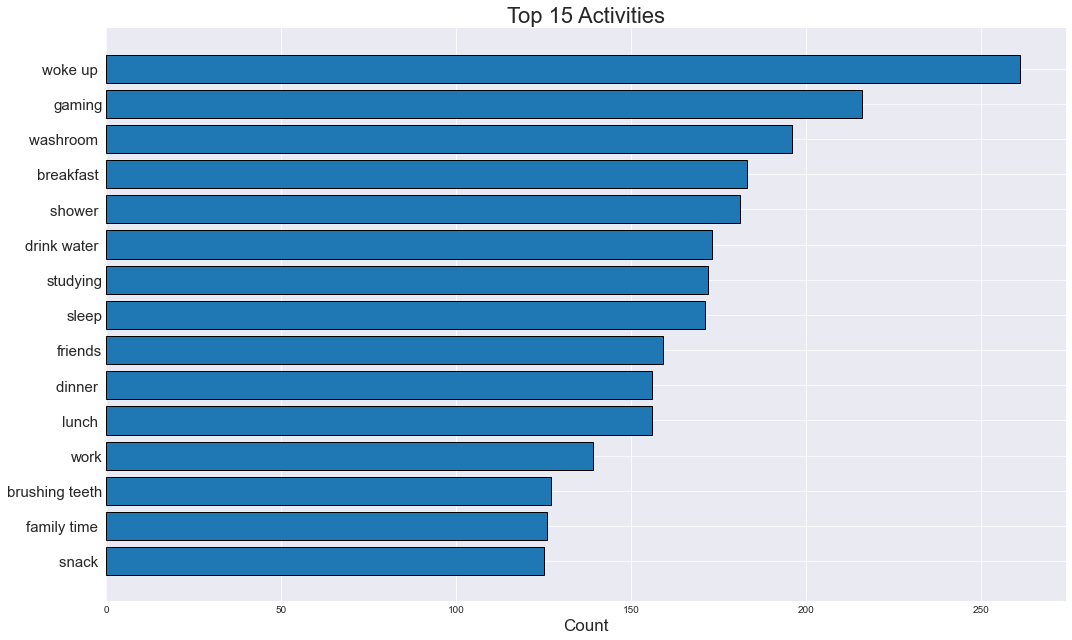

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
ax.barh(activities, count, edgecolor='black') 
ax.set_xlabel("Count", size=17)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_title("Top 15 Activities", size=22)
fig.tight_layout()  # fixes the spacing for the x ticks
plt.show()

### 2020 Only

## District Distribution as a Horizontal Bar Chart: Mood / Day of the Week

In [18]:
color, val = zip(*df['color, val'])
df['val'] = val
df

,Unnamed: 0,full_date,weekday,mood,activities,"color, val",val
0,1,2020-08-02,Sunday,tired,"[friends, family time , snack , visit, travel]","(yellow, 3)",3
1,2,2020-08-01,Saturday,tired,"[family time , movies & tv, brushing teeth, wa...","(yellow, 3)",3
2,3,2020-08-01,Saturday,good,"[snack , work]","(light green, 4)",4
3,4,2020-08-01,Saturday,nervous,"[friends, lunch ]","(lime green, 5)",5
4,5,2020-07-31,Friday,meh,"[sleep, brushing teeth, washroom , drink water...","(yellow, 3)",3
...,...,...,...,...,...,...,...
1479,1533,2019-03-01,Friday,meh,[work],"(yellow, 3)",3
1480,1534,2019-02-28,Thursday,meh,"[relax, studying]","(yellow, 3)",3
1481,1535,2019-02-28,Thursday,good,[studying],"(light green, 4)",4
1482,1536,2019-02-27,Wednesday,good,"[relax, reading, studying, work]","(light green, 4)",4


In [19]:
# creating a 7,5 dataframe that corresponds to days of the week and mood
df_mood = pd.DataFrame(np.zeros((7,5)),
                       index=df.weekday.unique(),
                       columns=['red', 'orange', 'yellow', 'light green', 'lime green'])

In [20]:
for weekday, color in zip(df.weekday, color):
    df_mood.loc[weekday, color] += 1

In [21]:
df_mood

,red,orange,yellow,light green,lime green
Sunday,1.0,10.0,112.0,56.0,11.0
Saturday,2.0,17.0,118.0,52.0,8.0
Friday,1.0,16.0,108.0,58.0,15.0
Thursday,1.0,13.0,111.0,63.0,21.0
Wednesday,2.0,15.0,136.0,64.0,8.0
Tuesday,2.0,14.0,151.0,59.0,10.0
Monday,0.0,13.0,142.0,58.0,16.0


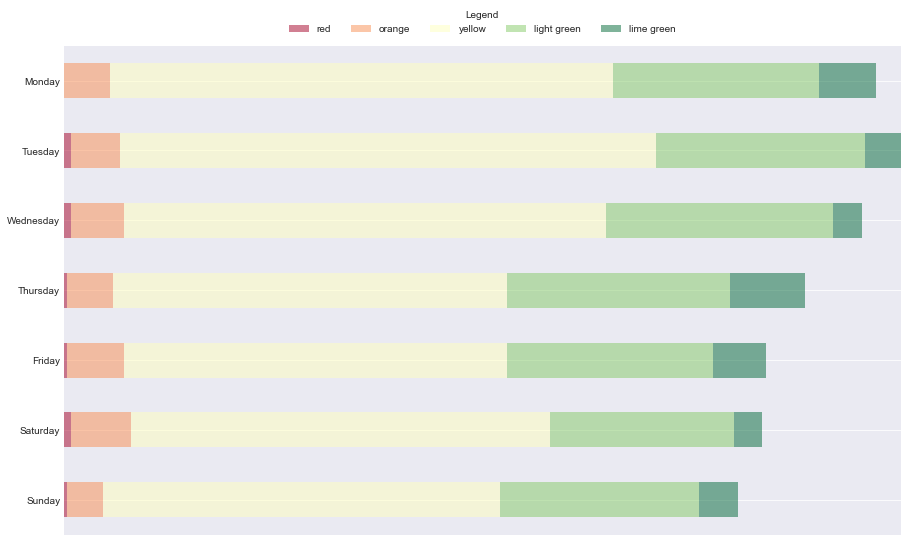

In [22]:
df_mood.plot.barh(xlim=(0, np.sum(df_mood, axis=1).max()), 
                  colormap='RdYlGn', stacked=True, alpha=0.5)

fig, ax = plt.gcf(), plt.gca()
fig.set_size_inches(15, 9)
ax.xaxis.set_visible(False)
ax.legend(title='Legend',ncol=len(df_mood.index), bbox_to_anchor=(0.5,1.09),loc='upper center', fontsize='medium')
plt.show()

## Time Series

<AxesSubplot:xlabel='full_date', ylabel='Value'>

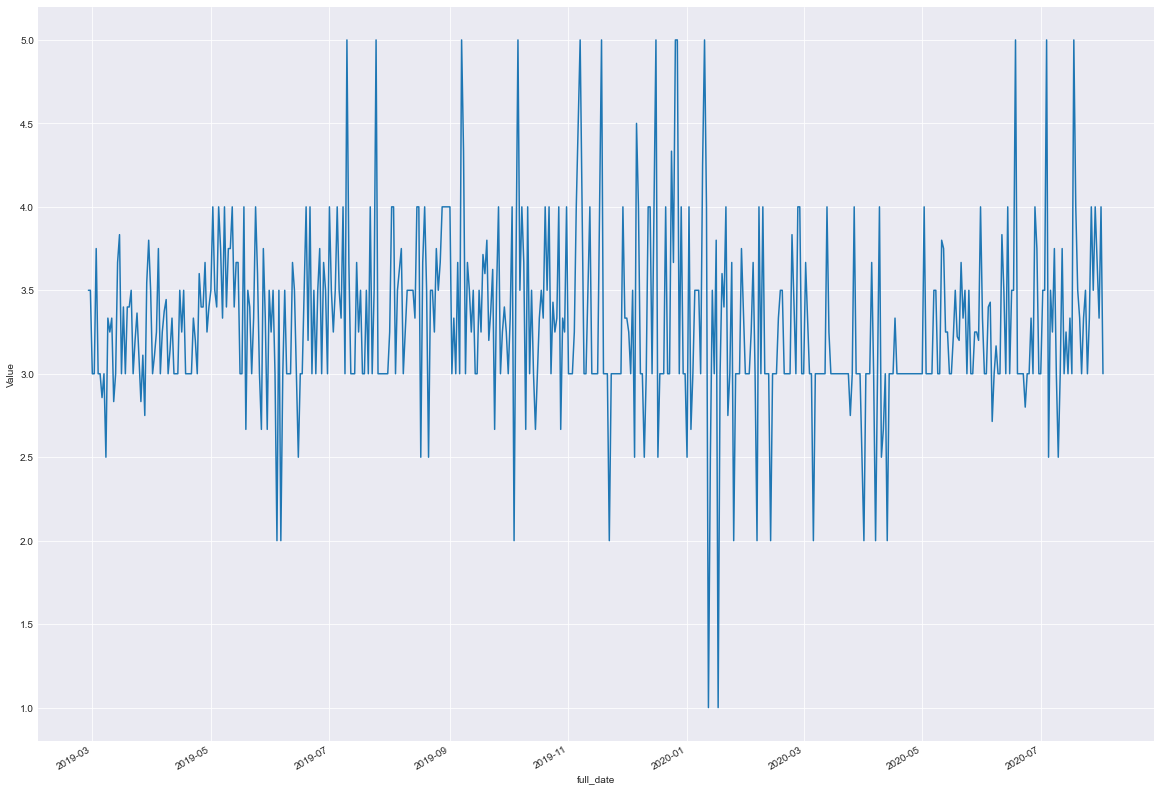

In [23]:
df.groupby('full_date')['val'].mean().plot.line(
    ylabel='Value',figsize=(20,15)
)

## 2020 Only

In [24]:
count_activities = Counter()

In [25]:
for activity in df.activities[df.full_date >= datetime(2020, 1, 1)]:
    count_activities.update(activity)

In [26]:
activities, count = zip(*reversed(count_activities.most_common(15)))

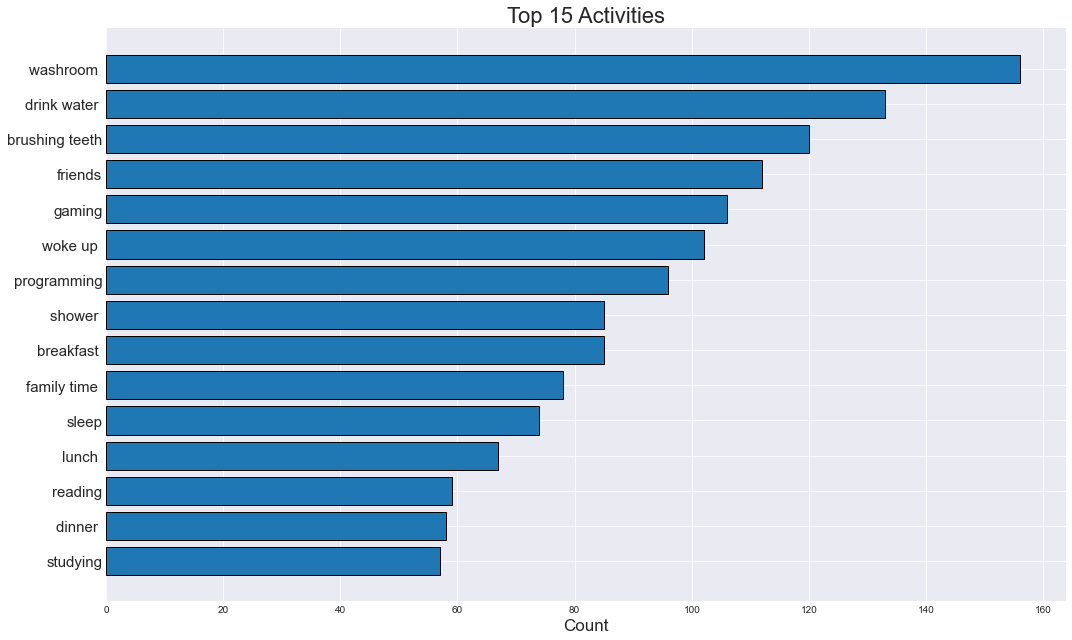

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
ax.barh(activities, count, edgecolor='black')
ax.set_xlabel("Count", size=17)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_title("Top 15 Activities", size=22)
fig.tight_layout()  # fixes the spacing for the x ticks
plt.show()


In [28]:
color, val = zip(*df['color, val'][df.full_date >= datetime(2020, 1, 1)])

In [29]:
df_mood = pd.DataFrame(np.zeros((7,5)),
                       index=df.weekday.unique(),
                       columns=['red', 'orange', 'yellow', 'light green', 'lime green'])

In [30]:
for weekday, color in zip(df.weekday, color):
    df_mood.loc[weekday, color] += 1

In [ ]:
df_mood

In [ ]:
df_mood.plot.barh(xlim=(0, np.sum(df_mood, axis=1).max()), 
                  colormap='RdYlGn', stacked=True, alpha=0.5)

fig, ax = plt.gcf(), plt.gca()
fig.set_size_inches(15, 9)
ax.xaxis.set_visible(False)
ax.legend(title='Legend',ncol=len(df_mood.index), bbox_to_anchor=(0.5,1.09),loc='upper center', fontsize='medium')
plt.show()

In [ ]:
df.groupby('full_date')['val'].mean().plot.line(
    xlim=(datetime(2020,1,1), datetime(2020,8,4)),
    ylabel="Value",figsize=(20,15)
)

In [ ]:
df.groupby('weekday')['val'].mean()

,red,orange,yellow,light green,lime green
Sunday,1.0,4.0,52.0,11.0,6.0
Saturday,2.0,7.0,53.0,13.0,3.0
Friday,1.0,6.0,49.0,15.0,9.0
Thursday,0.0,6.0,46.0,21.0,10.0
Wednesday,2.0,6.0,55.0,18.0,1.0
Tuesday,0.0,5.0,65.0,20.0,4.0
Monday,0.0,5.0,62.0,18.0,9.0


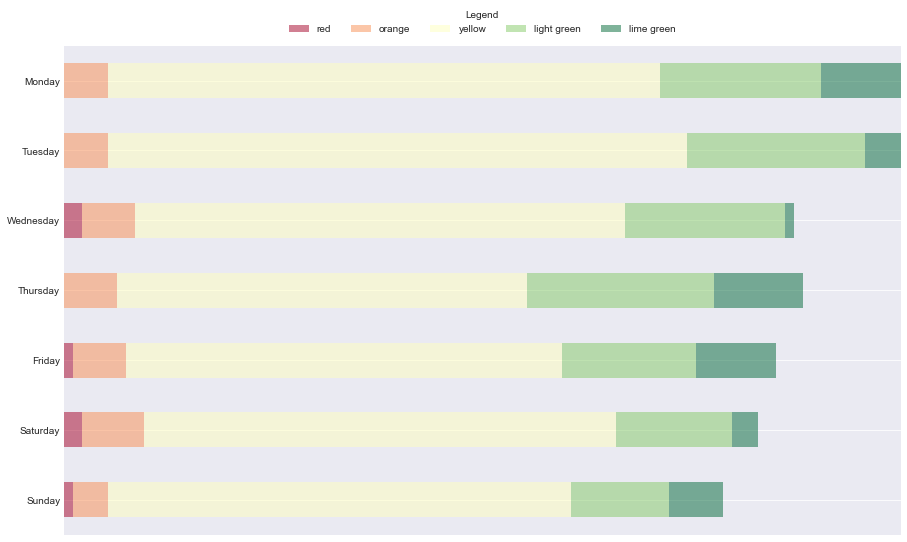

In [32]:
df_mood.plot.barh(xlim=(0, np.sum(df_mood, axis=1).max()), 
                  colormap='RdYlGn', stacked=True, alpha=0.5)

fig, ax = plt.gcf(), plt.gca()
fig.set_size_inches(15, 9)
ax.xaxis.set_visible(False)
ax.legend(title='Legend',ncol=len(df_mood.index), bbox_to_anchor=(0.5,1.09),loc='upper center', fontsize='medium')
plt.show()

<AxesSubplot:xlabel='full_date', ylabel='Value'>

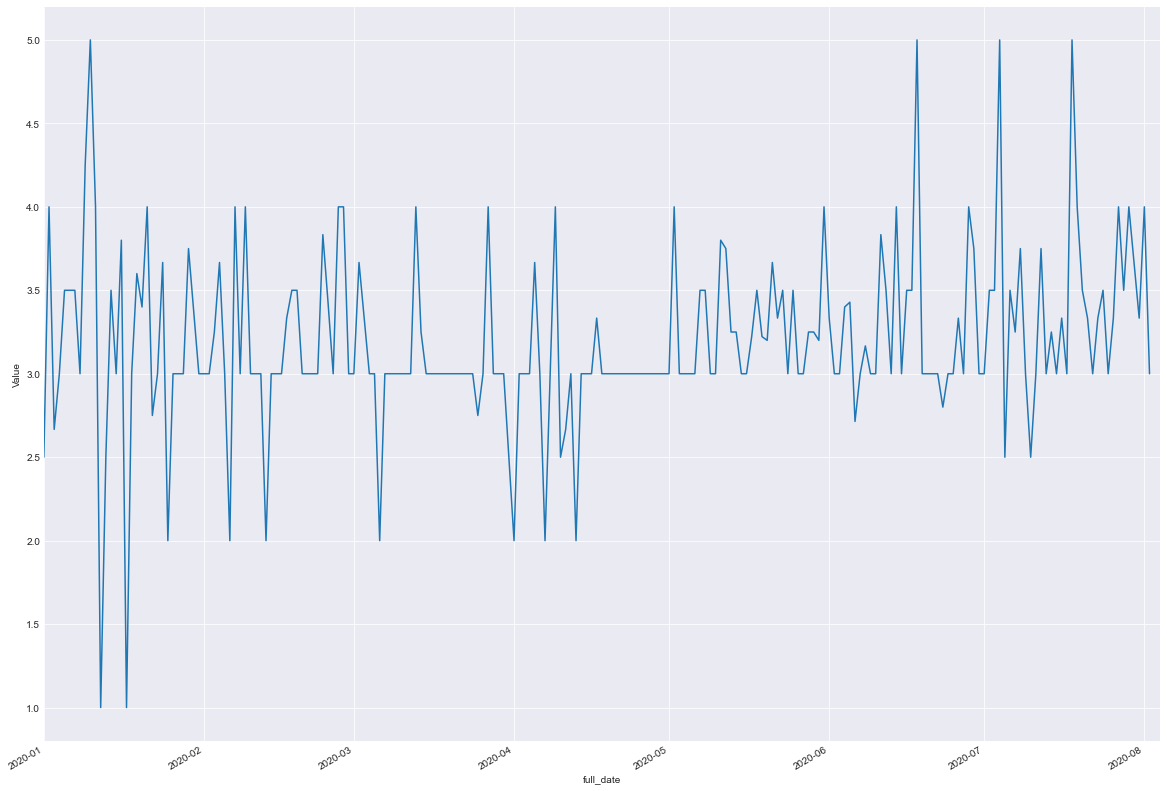

In [33]:
df.groupby('full_date')['val'].mean().plot.line(
    xlim=(datetime(2020,1,1), datetime(2020,8,4)),
    ylabel="Value",figsize=(20,15)
)

In [35]:
df.groupby('weekday')['val'].mean()

weekday
Friday       3.353535
Monday       3.336245
Saturday     3.238579
Sunday       3.347368
Thursday     3.430622
Tuesday      3.258475
Wednesday    3.271111
Name: val, dtype: float64